In [6]:
import numpy as np  # as always import the nesscary packages / libraries. 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
class Plotter: # plotter class defined using the predesigned code. 
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
        plt.title(f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()


In [8]:
class DataTransform: # use the DataTransfrom class change to the right dtypes form the .csv df. 
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df4_unskewed.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "funded_amount": "float64",
        "funded_amount_inv": "float64",
        "term": "category",
        "int_rate": "float64",
        "instalment": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "out_prncp_inv": "float64",
        "total_payment": "float64",
        "total_payment_inv": "float64",
        "total_rec_prncp": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_t5 = transformer.change_dtypes(dtype_dict)

    print("\nTransformed DataFrame dtypes:\n") # make sure it has been successful. 
    dtype_df = pd.DataFrame({"Columns" : df_t5.columns, "Dtype" : df_t5.dtypes}).reset_index(drop=True)
    print(dtype_df.sort_values("Columns").reset_index(drop=True))


Transformed DataFrame dtypes:

                       Columns           Dtype
0                   annual_inc         float64
1             application_type        category
2      collection_recovery_fee         float64
3   collections_12_mths_ex_med        category
4                  delinq_2yrs           int64
5                          dti         float64
6         earliest_credit_line  datetime64[ns]
7            employment_length        category
8                funded_amount         float64
9            funded_amount_inv         float64
10                       grade        category
11              home_ownership        category
12                          id           int64
13              inq_last_6mths           int64
14                  instalment         float64
15                    int_rate         float64
16                  issue_date  datetime64[ns]
17       last_credit_pull_date  datetime64[ns]
18         last_payment_amount         float64
19           last_payment_da

In [56]:
plotter = Plotter(df_t5) # intialize plotter instance. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


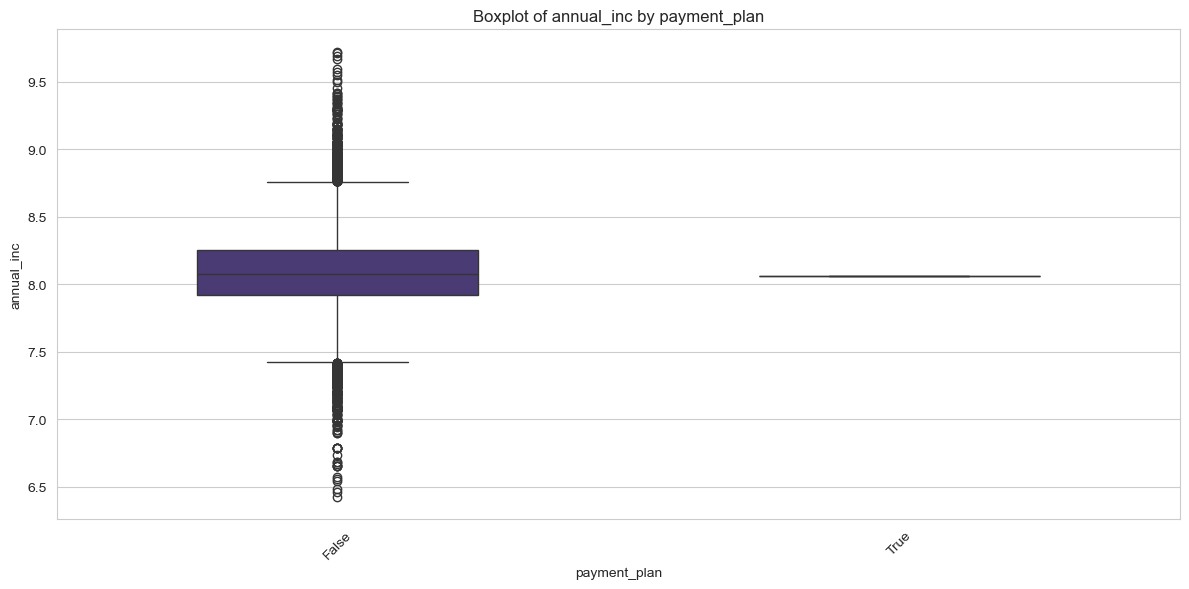

In [55]:
plotter.boxplot("payment_plan", "annual_inc")

Payment plan used as the X categorical, as it is a bool, so only 2 boxes, makes for easier vsiaulization. 
Here we can clearly see one of the numeric columns 'annual_inc" , chosen at random, contains many outliers.
So thus it is worth removing outliers of the numeric dtyope columns. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


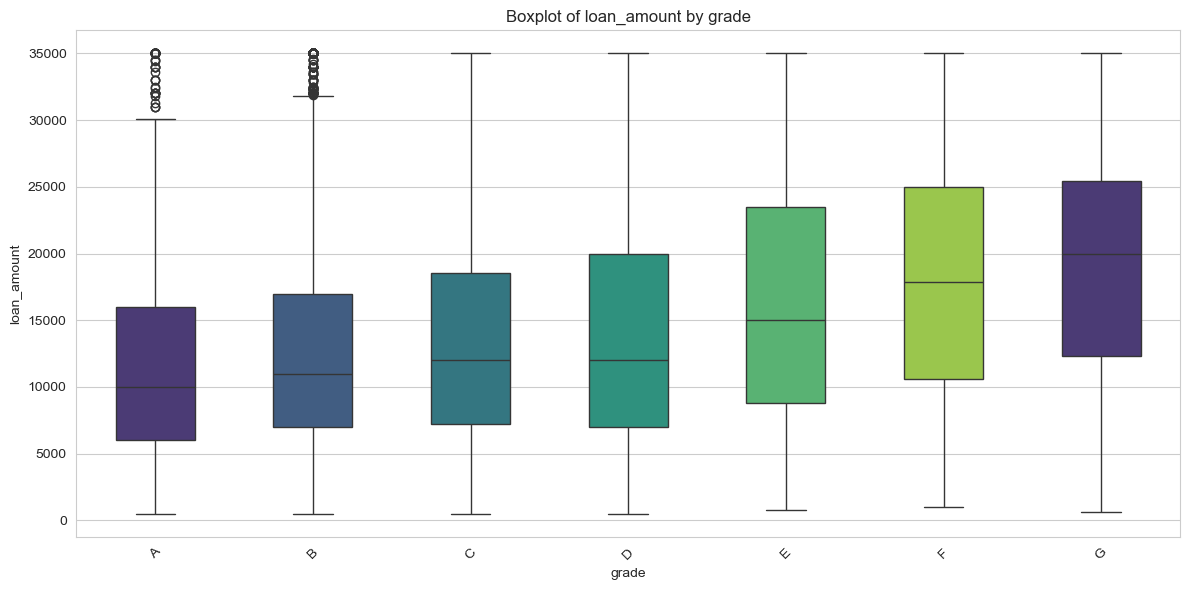

In [57]:
plotter.boxplot("grade", "loan_amount") 
# Here we can see than another numeric column loan_amount has outliers, intrestingly only in the A & B grades. 

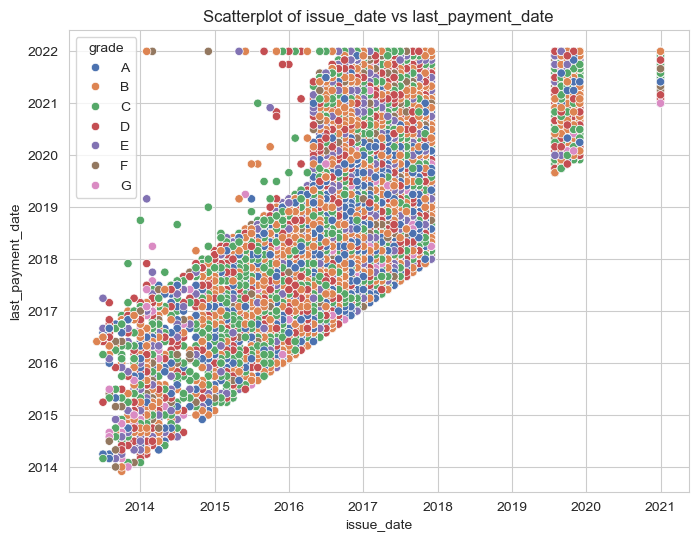

In [58]:
plotter.scatterplot("issue_date", "last_payment_date", hue="grade", palette="deep")
# looking for outliers in datetime dtypes. using a datetime against datetime in a scatterplot, but isn't very clear.
# also testing out the hue function

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


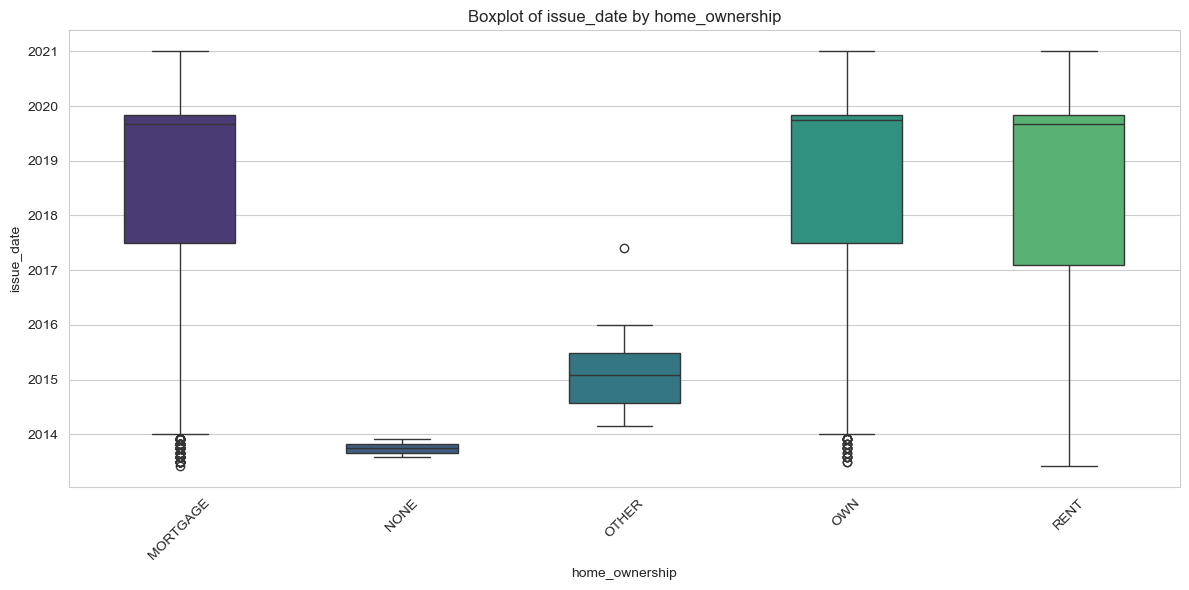

In [59]:
plotter.boxplot("home_ownership", "issue_date")

Here we can see that there are some outliers in one the datetime dtypes: "issue date". 
There seems to be quite a few for the mortgage and own categories of home_ownership,
all quite far back. And one rare outlying datapoint in the other category. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


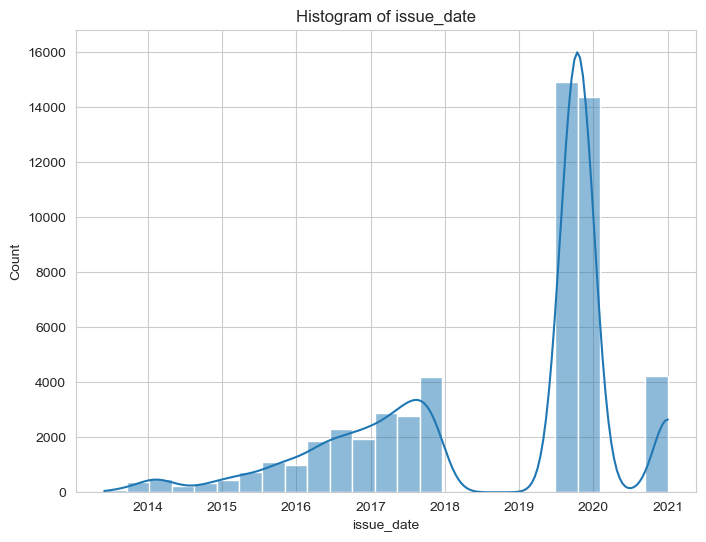

In [ ]:
plotter.histogram("issue_date") 

Here we can see that even without being broken up by home_ownership, any issue_date 
before 2014 is rare, and likely to be outlier, using the 1.5x IQR as the defination.
This makes it worth while to remove outliers frome the datetime dtypes. 

In [60]:

class DataFrameTransform: # DataFrameTransform Class, with the outlier removal functions added as Class instance methods. 
    def __init__(self, df):
        self.df = df

    @staticmethod
    def impute_mean(df, column_name):
        if column_name in df.columns and df[column_name].dtype in [np.float64, np.int64]:
            mean_value = df[column_name].mean()
            df = df.copy()
            df.loc[df[column_name].isna(), column_name] = mean_value
            print(f"Imputed mean value {mean_value:.2f} into null values of '{column_name}'")
        return df

    @staticmethod
    def impute_median(df, column_name):
        if column_name in df.columns and df[column_name].dtype in [np.float64, np.int64]:
            median_value = df[column_name].median()
            df = df.copy()
            df.loc[df[column_name].isna(), column_name] = median_value
            print(f"Imputed median value {median_value:.2f} into null values of '{column_name}'")
        return df

    @staticmethod
    def impute_mode(df, column_name):
        if column_name in df.columns:
            mode_value = df[column_name].mode()
            if not mode_value.empty:
                df = df.copy()
                df.loc[df[column_name].isna(), column_name] = mode_value[0]
                print(f"Imputed mode value '{mode_value[0]}' into null values of '{column_name}'")
        return df

    def log_tf(self, column_name):
        if column_name in self.df.columns and (self.df[column_name] >= 0).all():
            self.df[column_name] = self.df[column_name].map(lambda i: np.log(i + 1))
            print(f"Applied log transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Log Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply log transformation to '{column_name}'. Ensure there are no negative values.")

    def sqrt_tf(self, column_name):
        if column_name in self.df.columns and (self.df[column_name] >= 0).all():
            self.df[column_name] = self.df[column_name].map(lambda i: np.sqrt(i))
            print(f"Applied square root transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Square Root Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply square root transformation to '{column_name}'. Ensure all values are non-negative.")

    def bxcx_tf(self, column_name):
        if column_name in self.df.columns and (self.df[column_name] > 0).all():
            transformed, _ = stats.boxcox(self.df[column_name])
            self.df[column_name] = transformed
            print(f"Applied Box-Cox transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Box-Cox Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply Box-Cox transformation to '{column_name}'. Ensure all values are positive.")

    def yeoj_tf(self, column_name):
        if column_name in self.df.columns:
            transformed, _ = stats.yeojohnson(self.df[column_name])
            self.df[column_name] = transformed
            print(f"Applied Yeo-Johnson transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Yeo-Johnson Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply Yeo-Johnson transformation to '{column_name}'.")

    def rem_num_out(self):
        numeric_mask = pd.Series(True, index=self.df.index)
        for col in self.df.select_dtypes(include=[np.number]).columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            numeric_mask &= (self.df[col] >= lower_bound) & (self.df[col] <= upper_bound)
        self.df = self.df[numeric_mask]
        print("Removed numeric outliers.")

    def rem_dtme_out(self):
        datetime_mask = pd.Series(True, index=self.df.index)
        for col in self.df.select_dtypes(include=["datetime64[ns]"]).columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - pd.Timedelta(days=30 * 1.5 * (IQR / pd.Timedelta(days=30)))
            upper_bound = Q3 + pd.Timedelta(days=30 * 1.5 * (IQR / pd.Timedelta(days=30)))
            datetime_mask &= (self.df[col] >= lower_bound) & (self.df[col] <= upper_bound)
        self.df = self.df[datetime_mask]
        print("Removed datetime outliers using ~months (30 days) as the unit.")


    def get_dataframe(self):
        return self.df


In [49]:
df_t5_use = df_t5.copy() # create a copy of the df to modify 

rem_out = DataFrameTransform(df_t5_use) # instance of the dtf Class, using the copy of the df

rem_out.rem_num_out() # use the instance method to remove all outliers from numeric dtypes columns on the df copy
rem_out.rem_dtme_out() # use the instance method to remove all outliers from datetime dtypes columns on the df copy.

df_out_rem = rem_out.get_dataframe() # retrieve the modified df and assign it. 

plotter_outrem = Plotter(df_out_rem) # create a plotter Class instance with the modified df to visualize the the changes.


Removed numeric outliers.
Removed datetime outliers using ~months (30 days) as the unit.


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


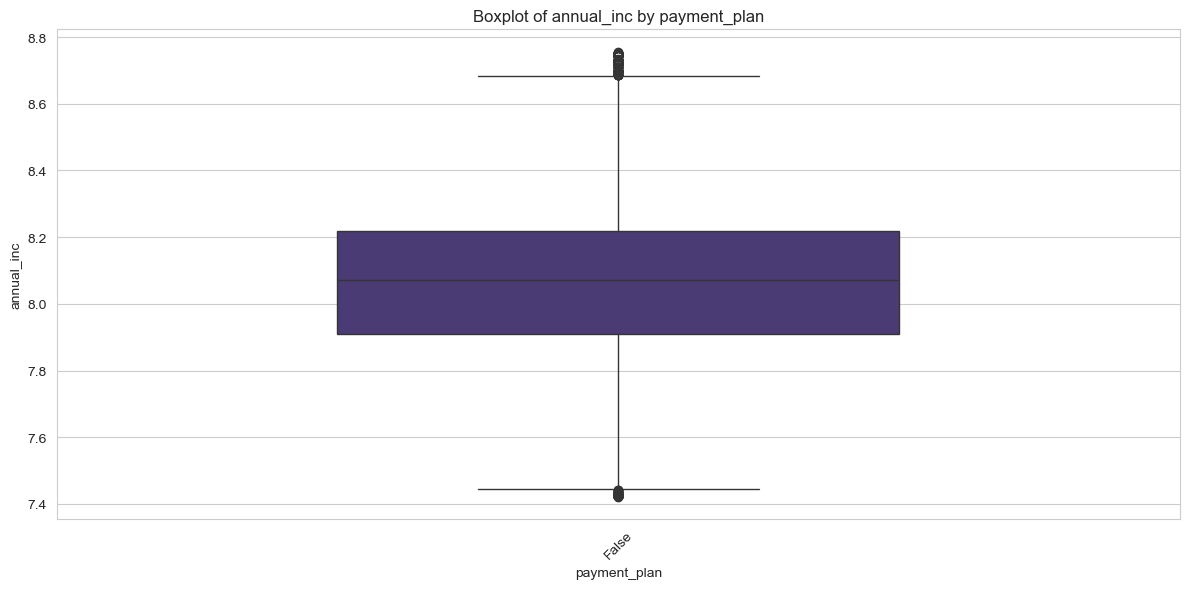

In [50]:
plotter_outrem.boxplot("payment_plan", "annual_inc")

As can see there have been some changes, and the outliers removed.

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


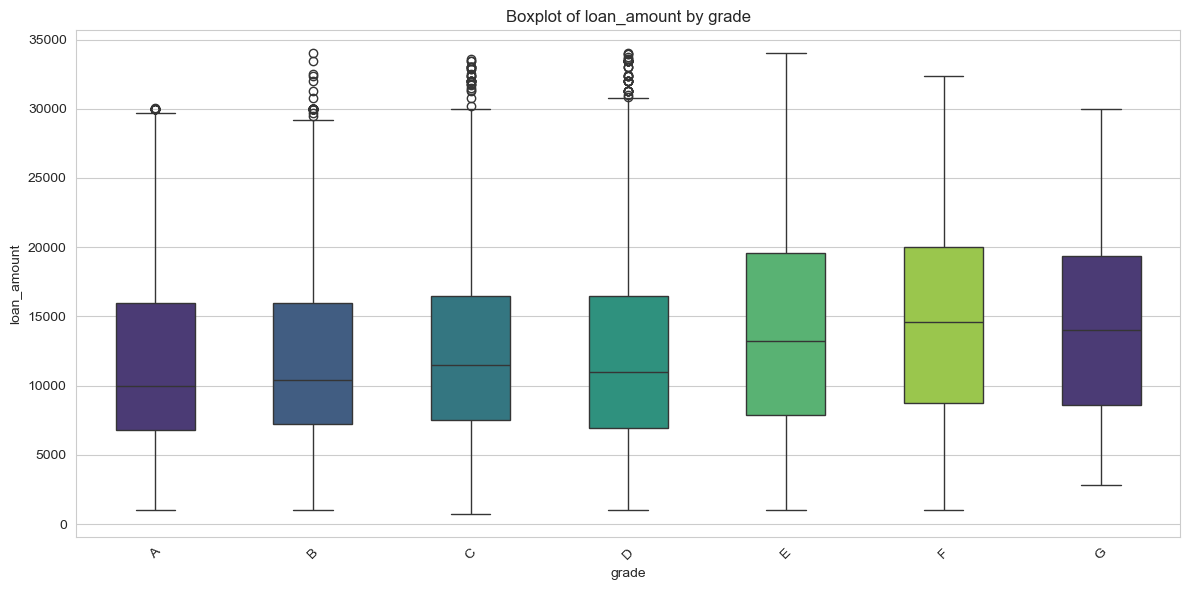

In [52]:
plotter_outrem.boxplot("grade", "loan_amount") 

Here we can see, that although it does show outliers based on the new modified data, all of the boxes are now lined up with similar medians and IQR's
This indicating that the outlier removeal has been successful. 

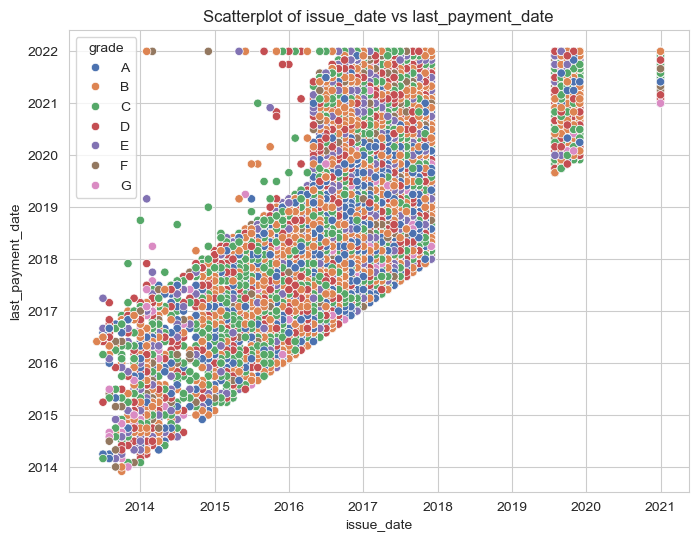

In [53]:
plotter.scatterplot("issue_date", "last_payment_date", hue="grade", palette="deep")
# just out curiousty can't really ascertain or visualize any change from this. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:31: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


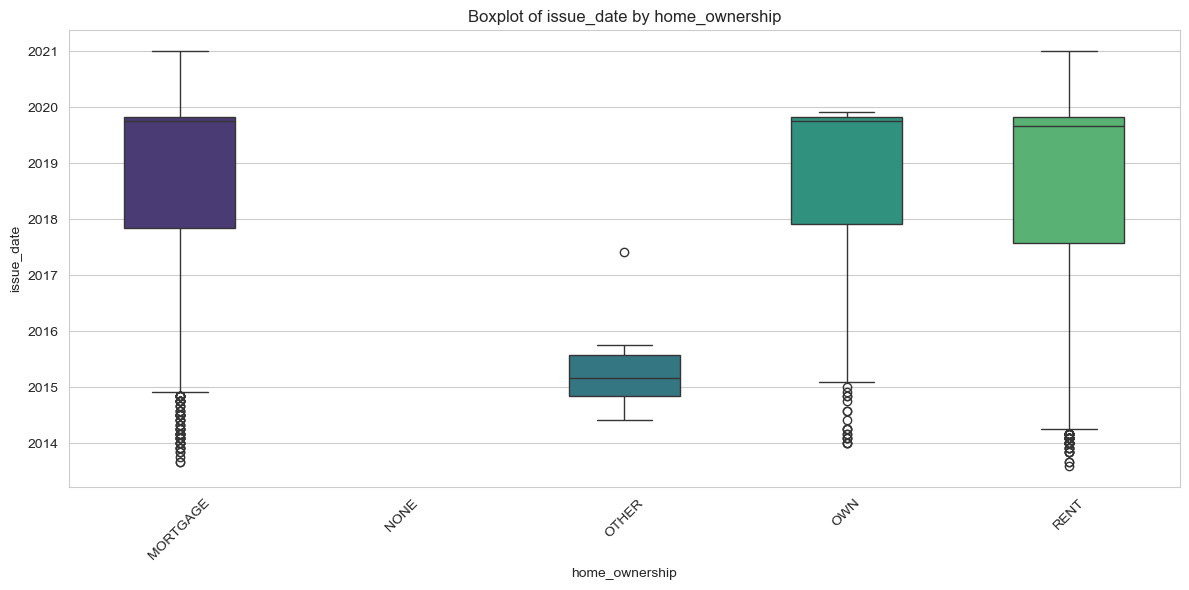

In [62]:
plotter_outrem.boxplot("home_ownership", "issue_date")

It is hard to see here, as it broken up home ownership category but there have been some changes. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


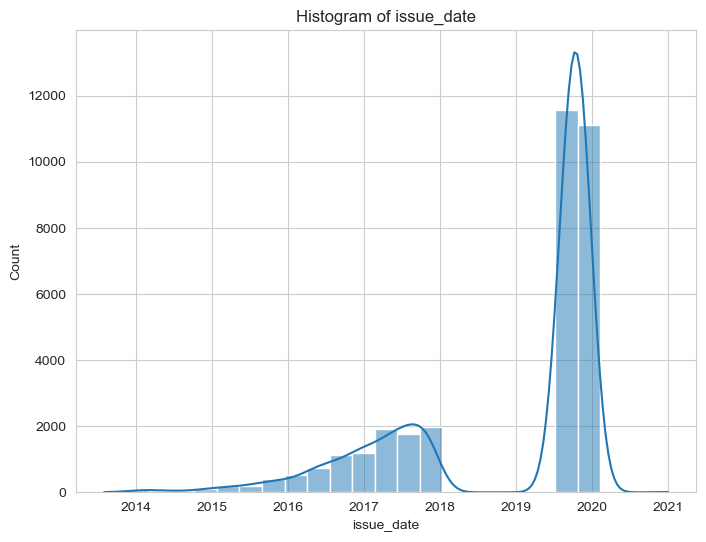

In [64]:
plotter_outrem.histogram("issue_date")

Here we can visualize the changes more succintly, as you can see with a comparsion of the unmodified,
df below, the bin at 2021 is completey gone, and bins devline around 2015 with what appears to be none
at 2014 and beyond. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_1381/786238671.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


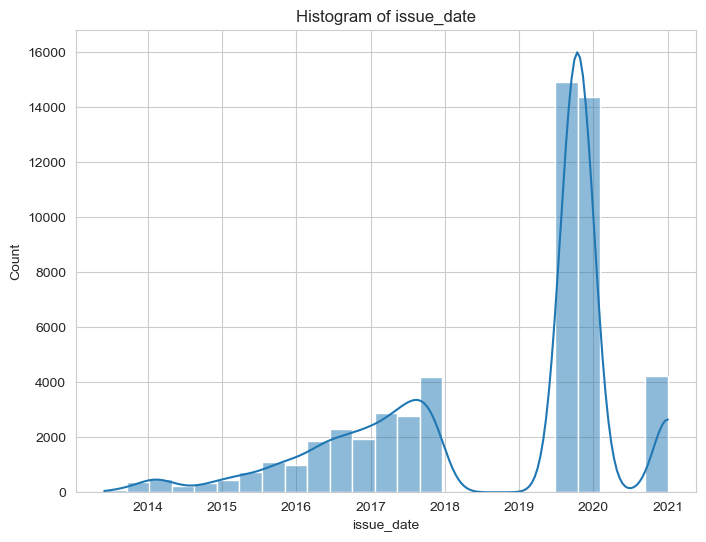

In [65]:
plotter.histogram("issue_date")

In [67]:
df_out_rem.to_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df5_outrem.csv")
# Save df with outliers removed to .csv file in chosen directory. 